In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import time
from datetime import datetime
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

import tushare as ts 
# 调取tushare api接口
pro = ts.pro_api('60967974046ffb16e01dff438e859cc4924749006a50beb8146f5bc2')

In [2]:
# 读取股票日行情数据
data = pd.read_feather('../../data/stk_daily.feather')
data = data[data['stk_id'].apply(lambda x: not x.endswith('BJ'))] # 去掉北交所股票
data

,stk_id,date,open,high,low,close,volume,amount,cumadj
0,000001.SZ,2020-01-02,16.65,16.95,16.55,16.87,153023000.0,2.571200e+09,98.0986
1,000001.SZ,2020-01-03,16.94,17.31,16.92,17.18,111619000.0,1.914500e+09,98.0986
2,000001.SZ,2020-01-06,17.01,17.34,16.91,17.07,86208400.0,1.477930e+09,98.0986
3,000001.SZ,2020-01-07,17.13,17.28,16.95,17.15,72860800.0,1.247050e+09,98.0986
4,000001.SZ,2020-01-08,17.00,17.05,16.63,16.66,84782400.0,1.423610e+09,98.0986
...,...,...,...,...,...,...,...,...,...
3168349,689009.SH,2022-12-26,32.55,32.98,32.03,32.25,2579640.0,8.356230e+07,1.0000
3168350,689009.SH,2022-12-27,32.75,32.88,32.11,32.79,2272600.0,7.412430e+07,1.0000
3168351,689009.SH,2022-12-28,32.81,32.90,32.05,32.16,1846270.0,5.959620e+07,1.0000
3168352,689009.SH,2022-12-29,32.28,32.28,30.78,30.84,4140600.0,1.300030e+08,1.0000


In [3]:
# 提取每日股票行情数据
data = list(data.groupby('stk_id'))

In [4]:
# 将股票日收盘价拼接成index为日期, columns为股票代码的DataFrame
close = pd.concat([d[1].set_index('date')['close'].rename(d[0]) for d in data], axis = 1)
close

,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,688787.SH,688788.SH,688789.SH,688793.SH,688798.SH,688799.SH,688800.SH,688819.SH,688981.SH,689009.SH
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,16.87,32.56,22.33,3.14,5.40,9.55,3.71,6.66,3.41,9.51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,17.18,32.05,22.35,3.15,5.48,9.51,3.75,6.40,3.41,9.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,17.07,31.51,21.75,3.15,5.46,9.48,3.73,7.04,3.43,9.39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,17.15,31.76,22.10,3.20,5.49,9.51,3.79,7.16,3.54,9.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,16.66,31.68,21.78,3.15,5.39,9.40,3.72,7.11,3.51,9.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,12.77,18.37,9.46,1.84,6.04,7.87,2.32,12.62,3.84,11.68,...,60.73,36.28,166.58,51.00,95.70,32.75,108.70,36.18,41.43,32.25
2022-12-27,13.11,18.51,9.70,1.89,6.64,7.84,2.34,12.26,3.86,11.93,...,60.01,36.65,165.91,52.49,98.09,31.93,111.00,36.76,41.48,32.79
2022-12-28,13.14,18.58,9.55,1.86,6.81,7.84,2.31,12.05,3.76,12.06,...,58.74,35.77,162.92,51.90,96.61,31.63,107.08,36.68,40.90,32.16


In [5]:
df = []
# 从api下载股票停牌数据
for date in tqdm(close.index.map(lambda x: datetime.strftime(x, '%Y%m%d'))): # 按日下载数据
    df.append(pro.suspend_d(suspend_type = 'S', trade_date = date))
    time.sleep(0.1) # 每隔一定时间下载一个交易日的数据, 否则会达到每分钟调取接口次数上限

  0%|          | 0/728 [00:00<?, ?it/s]

100%|██████████| 728/728 [02:17<00:00,  5.29it/s]


In [6]:
# 创建一个大小与收盘价相同的全0 DataFrame
suspend = pd.DataFrame(np.zeros(close.shape, dtype = int), index = close.index.copy(), columns = close.columns.copy())
for i, sus in enumerate(df):
    # 对每个交易日, 将停牌数据转化为一个one-hot vector, 作为DataFrame的一行
    if len(sus) > 0:
        suspend.iloc[i][list(set(sus['ts_code'].values).intersection(set(close.columns)))] = 1
suspend

,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,688787.SH,688788.SH,688789.SH,688793.SH,688798.SH,688799.SH,688800.SH,688819.SH,688981.SH,689009.SH
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-12-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-12-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# 将停牌数据保存到本文件夹(./newdata/)文件夹下
suspend.to_csv('./suspend.csv', index_label = False)

In [8]:
# 重新读取时, 要将index改为datetime格式!!!
suspend = pd.read_csv('./suspend.csv', index_col = 0)
suspend.index = pd.to_datetime(suspend.index) 

In [9]:
# 将股票累积复权因子拼接成index为日期, columns为股票代码的DataFrame
cumadj = pd.concat([d[1].set_index('date')['cumadj'].rename(d[0]) for d in data], axis = 1)

In [10]:
# 计算考虑停牌的复权收盘价
closeadj = close * cumadj
closeadj = closeadj[suspend == 0]
closeadj

,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,688787.SH,688788.SH,688789.SH,688793.SH,688798.SH,688799.SH,688800.SH,688819.SH,688981.SH,689009.SH
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,1654.923382,3613.80184,144.885302,21.578206,211.005540,64.607374,91.028931,54.590488,36.737976,36.147985,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,1685.333948,3557.19745,145.015070,21.646894,214.131548,64.336767,92.010375,52.459328,36.737976,36.071964,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,1674.543102,3497.26339,141.121830,21.646894,213.350046,64.133906,91.519653,57.705331,36.953448,35.691859,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,1682.390990,3525.01064,143.392977,21.990496,214.522299,64.336767,92.991819,58.688873,38.138544,36.300028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,1634.322676,3516.13152,141.316699,21.646894,210.614789,63.592692,91.274292,58.278964,37.815336,35.311754,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,1307.418140,2374.24902,61.379886,12.644609,259.421624,53.241888,57.116080,104.021233,41.370624,50.396397,...,61.037294,51.843032,167.349600,51.936360,96.216780,33.488185,109.018491,37.345720,41.43,32.25
2022-12-27,1342.228020,2392.34346,62.937092,12.988193,285.191984,53.039011,57.608460,101.053908,41.586482,51.475087,...,60.313651,52.371750,166.676504,53.453716,98.619686,32.649702,111.326340,37.944407,41.48,32.79
2022-12-28,1345.299480,2401.39068,61.963934,12.781994,292.493586,53.039011,56.869890,99.322848,40.508736,52.036006,...,59.037224,51.114257,163.672690,52.852884,97.131694,32.343257,107.393744,37.861830,40.90,32.16


In [11]:
# 根据收盘价计算收益率
ret = closeadj.pct_change(fill_method = None)
ret

,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,688787.SH,688788.SH,688789.SH,688793.SH,688798.SH,688799.SH,688800.SH,688819.SH,688981.SH,689009.SH
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,0.018376,-0.015663,0.000896,0.003183,0.014815,-0.004188,0.010782,-0.039039,0.000000,-0.002103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,-0.006403,-0.016849,-0.026847,0.000000,-0.003650,-0.003153,-0.005333,0.100001,0.005865,-0.010537,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,0.004687,0.007934,0.016094,0.015873,0.005495,0.003163,0.016086,0.017044,0.032070,0.017039,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,-0.028571,-0.002519,-0.014480,-0.015625,-0.018215,-0.011565,-0.018470,-0.006984,-0.008475,-0.027225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,-0.016179,-0.021832,0.012848,0.000000,0.021997,-0.006315,0.008696,0.012029,0.037838,-0.008489,...,0.031245,0.030097,0.000120,-0.045659,0.003671,-0.017696,0.073146,0.049000,0.009011,-0.002474
2022-12-27,0.026625,0.007621,0.025370,0.027172,0.099338,-0.003810,0.008621,-0.028526,0.005218,0.021404,...,-0.011856,0.010198,-0.004022,0.029216,0.024974,-0.025038,0.021169,0.016031,0.001207,0.016744
2022-12-28,0.002288,0.003782,-0.015462,-0.015876,0.025602,0.000000,-0.012821,-0.017130,-0.025916,0.010897,...,-0.021163,-0.024011,-0.018022,-0.011240,-0.015088,-0.009386,-0.035325,-0.002176,-0.013983,-0.019213


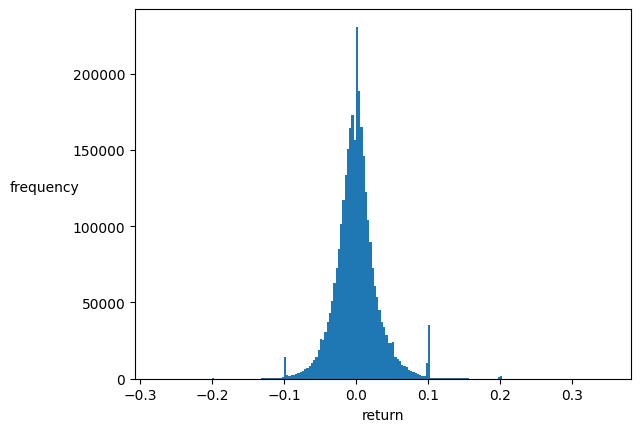

In [12]:
# 画出收益率分布
plt.hist(ret.values.reshape(-1), bins = 200)
plt.xlabel('return')
plt.ylabel('frequency', rotation = 0, labelpad = 20)
plt.show()

In [13]:
# 检查收益率是否有inf
np.isinf(ret).sum().sum()

0

In [14]:
# 检查收益率绝对值极值
sorted(abs(ret).max().dropna(), reverse = True)[:10]

[0.35025380710659904,
 0.3008071316708829,
 0.2951851851851852,
 0.27894831622546357,
 0.2758668515950069,
 0.27314285714285713,
 0.2727272727272727,
 0.2712025316455696,
 0.2638594365343835,
 0.2521072796934867]

In [15]:
# 检查收益率绝对值极值
sorted((abs(ret) > 0.205).sum(), reverse = True)[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

收益率绝对值最大为0.35, 其余都在0.3以下, 且大于0.2的数据在每只股票上至多出现一次, 考虑到新股上市的情况, 可以认为这是没有问题的。

In [16]:
# 检查收益率为0的比例
((ret == 0).mean() > 0.2).sum()

20

仅有20只股票在2020-2022年的收益率为0的占比高于20%, 可以认为对回测影响很小。